<a href="https://colab.research.google.com/github/tanvinaminul/ML-DL-IITKGP/blob/master/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
import numpy as np
import heapq
import matplotlib.pyplot as plt
from nltk.tokenize import RegexpTokenizer
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Activation
from keras.layers import LSTM
import pickle 
from keras.optimizers import RMSprop

In [58]:
path= "/content/data.txt"
text= open(path).read().lower()
print("Length of the corpus is::", len(text))
print(text[:100])

Length of the corpus is:: 491890
nce upon a time there lived a king who had seven queens, but no children. this was a great grief to 


In [59]:
tokenizer= RegexpTokenizer(r'\w+')
words= tokenizer.tokenize(text)
print(words)

['nce', 'upon', 'a', 'time', 'there', 'lived', 'a', 'king', 'who', 'had', 'seven', 'queens', 'but', 'no', 'children', 'this', 'was', 'a', 'great', 'grief', 'to', 'him', 'especially', 'when', 'he', 'remembered', 'that', 'on', 'his', 'death', 'there', 'would', 'be', 'no', 'heir', 'to', 'inherit', 'the', 'kingdom', 'now', 'it', 'happened', 'one', 'day', 'that', 'a', 'poor', 'old', 'fakir', 'came', 'to', 'the', 'king', 'and', 'said', 'your', 'prayers', 'are', 'heard', 'your', 'desire', 'shall', 'be', 'accomplished', 'and', 'one', 'of', 'your', 'seven', 'queens', 'shall', 'bear', 'a', 'son', 'the', 'king', 's', 'delight', 'at', 'this', 'promise', 'knew', 'no', 'bounds', 'and', 'he', 'gave', 'orders', 'for', 'appropriate', 'festivities', 'to', 'be', 'prepared', 'against', 'the', 'coming', 'event', 'throughout', 'the', 'length', 'and', 'breadth', 'of', 'the', 'land', 'meanwhile', 'the', 'seven', 'queens', 'lived', 'luxuriously', 'in', 'a', 'splendid', 'palace', 'attended', 'by', 'hundreds', '

In [66]:
unique_words= np.unique(words)
print(len(unique_words))
unique_words_index= dict((c,i) for i, c in enumerate(unique_words) )
LENGTH_WORD= 5
next_words= []
prev_words= []
for j in range(len(words) - LENGTH_WORD):
  prev_words.append(words[j:j + LENGTH_WORD])
  next_words.append(words[j + LENGTH_WORD])
print(prev_words[0])
print(next_words[0])

8145
['nce', 'upon', 'a', 'time', 'there']
lived


In [61]:
# Create X and Y to store word projections
X = np.zeros((len(prev_words), LENGTH_WORD, len(unique_words)), dtype=bool)
Y = np.zeros((len(next_words), len(unique_words)), dtype=bool)
for i, each_words in enumerate(prev_words):
  for j, each_word in enumerate(each_words):
    X[i, j, unique_words_index[each_word]] = 1
  Y[i, unique_words_index[next_words[i]]] = 1

In [62]:
model= Sequential()
model.add(LSTM(128, input_shape= (LENGTH_WORD, len(unique_words))))
model.add(Dense(len(unique_words)))
model.add(Activation('softmax'))
optimizer = RMSprop(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history = model.fit(X, Y, validation_split=0.05, batch_size=128, epochs=10, shuffle=True).history

Epoch 1/10
674/674 [==============================] - 201s 294ms/step - loss: 6.3151 - accuracy: 0.0975 - val_loss: 5.9830 - val_accuracy: 0.1293
Epoch 2/10
674/674 [==============================] - 196s 291ms/step - loss: 5.9388 - accuracy: 0.1379 - val_loss: 6.2883 - val_accuracy: 0.1414
Epoch 3/10
674/674 [==============================] - 196s 291ms/step - loss: 5.9670 - accuracy: 0.1677 - val_loss: 6.4963 - val_accuracy: 0.1373
Epoch 4/10
674/674 [==============================] - 195s 289ms/step - loss: 5.6625 - accuracy: 0.2035 - val_loss: 6.6585 - val_accuracy: 0.1232
Epoch 5/10
674/674 [==============================] - 196s 290ms/step - loss: 5.3154 - accuracy: 0.2485 - val_loss: 6.7853 - val_accuracy: 0.1282
Epoch 6/10
674/674 [==============================] - 196s 291ms/step - loss: 5.0131 - accuracy: 0.2958 - val_loss: 6.9442 - val_accuracy: 0.1117
Epoch 7/10
674/674 [==============================] - 197s 292ms/step - loss: 4.7584 - accuracy: 0.3411 - val_loss: 7.0258 -

In [63]:
# Save the model
model.save('next_word_model.h5')
pickle.dump(history, open("history.p", "wb"))
model = load_model("next_word_model.h5")
history = pickle.load(open("history.p", "rb"))

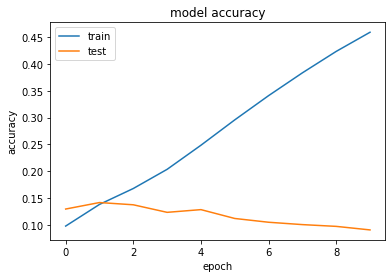

In [64]:
# Accuracy plots
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend (['train', 'test'], loc='upper left')

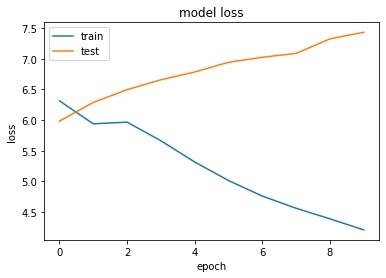

In [65]:
# Loss plots
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')